In [1]:
from atlassian import Jira
import os
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import datetime

In [16]:
os.environ['JIRA_URL']

'https://jira.corporativo.pt'

In [23]:
jira_instance = Jira(
    url = os.environ['JIRA_URL'],
    username = os.environ['JIRA_USER'],
    password = os.environ['JIRA_PWD'],
)

In [24]:
type(jira_instance)

atlassian.jira.Jira

In [25]:
datetime.now().strftime("%B")

'March'

In [26]:
first_day=f"{datetime.now().year}/{datetime.now().strftime('%m')}/01"
last_day=f"{datetime.now().year}/{datetime.now().strftime('%m')}/{calendar.monthrange(datetime.now().year, datetime.now().month)[1]}"
first_day, last_day

('2022/03/01', '2022/03/31')

In [27]:
results = jira_instance.jql(f"worklogDate >= '{first_day}' AND worklogDate <= '{last_day}' AND worklogAuthor in ('{os.environ['JIRA_USER']}')")

In [28]:
type(results)

dict

In [80]:
#results['issues'][0]['fields']['summary']

'Sprint Planning + Rituals Sprint 23'

In [95]:
#results['issues'][0]['fields']['worklog']['worklogs']

In [82]:
timetracks = pd.DataFrame()
task_names = []
task_date = []
task_timeSpent = []

for task in results['issues']:
    for worklog in task['fields']['worklog']['worklogs']:
        task_names.append(f"[NOS] [{task['key']}] {task['fields']['summary']}")
        task_date.append(worklog['started'][:10])
        task_timeSpent.append(worklog['timeSpentSeconds']/3600)

timetracks['name'] = task_names
timetracks['date'] = task_date
timetracks['timeSpent'] = task_timeSpent

In [83]:
timetracks.sort_values('date', ascending=True, inplace=True)

In [84]:
timetracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11 non-null     object 
 1   date       11 non-null     object 
 2   timeSpent  11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 352.0+ bytes


In [85]:
timetracks

,name,date,timeSpent
0,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-21,1.5
1,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-22,0.5
2,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-23,0.5
8,[NOS] [CRMPUS-302] Chapter DS,2022-02-23,0.5
3,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-24,1.5
7,[NOS] [CRMPUS-302] Chapter DS,2022-02-24,4.5
4,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-25,1.5
9,[NOS] [CRMPUS-302] Chapter DS,2022-02-25,0.5
5,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-02-28,1.0
6,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-03-02,1.0


In [87]:
first_day.replace('/','-')

'2022-03-01'

In [88]:
timetracks_month = timetracks[timetracks['date'] >= first_day.replace('/','-')]
timetracks_month

,name,date,timeSpent
6,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-03-02,1.0
10,[NOS] [CRMPUS-302] Chapter DS,2022-03-02,2.5


In [89]:
timetracks_month.to_csv(f'data/{datetime.now().strftime("%B")}{datetime.now().year}.csv', index=False, encoding='utf-8')

In [92]:
cum_task_time = timetracks_month.groupby('name').agg({'timeSpent': 'sum'}).reset_index().sort_values('timeSpent', ascending=False)

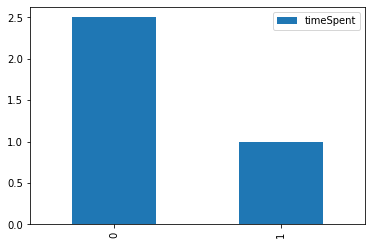

In [110]:
cum_task_time.plot(kind='bar')
plt.savefig(f'data/distribution_timespent_tasks_{datetime.now().strftime("%B")}{datetime.now().year}.png')

In [94]:
timetracks_month.groupby('name').agg({'timeSpent': 'sum'}).reset_index().sort_values('timeSpent', ascending=False)

,name,timeSpent
0,[NOS] [CRMPUS-302] Chapter DS,2.5
1,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,1.0


In [2]:
march = pd.read_csv('data/March2022.csv')

In [3]:
march

,name,date,timeSpent
0,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-03-02,1.0
1,[NOS] [CRMPUS-302] Chapter DS,2022-03-02,2.5


In [4]:
march_v2 = pd.read_csv('../Timely/data/March2022.csv')
march_v2

,name,date,timeSpent
0,[NOS] [CRMPUS-307] Overview do código do módul...,2022-03-02,2.0
1,[NOS] [CRMPUS-302] Chapter DS,2022-03-02,3.0
2,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,2022-03-02,1.0
3,[NOS] [CRMPUS-303] Daily Execution Sprint 23,2022-03-02,1.0
4,[NOS] [CRMPUS-307] Overview do código do módul...,2022-03-03,6.0
...,...,...,...
65,[NOS] [CRMPUS-309] Definir a periodicidade par...,2022-03-30,1.0
66,[NOS] [CRMPUS-308] Definição e criação das tab...,2022-03-31,2.0
67,[NOS] [CRMPUS-332] Sprint Planning + Rituals S...,2022-03-31,1.0
68,[NOS] [CRMPUS-336] Implementar/testar end-to-e...,2022-03-31,3.0


In [5]:
#march_v2['StartTime'] = march_v2[['date', 'timeSpent']].apply(lambda x: next(x[1]), axis=1)

## 

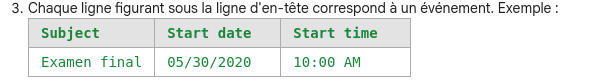

In [6]:
march_v3 = march_v2.rename(columns={'name': 'Subject', 'date': 'Start Date'})
march_v3['Start Date'] = march_v3['Start Date'].map(lambda x: ('/').join([x.split('-')[1], x.split('-')[2], x.split('-')[0]]))
march_v3

,Subject,Start Date,timeSpent
0,[NOS] [CRMPUS-307] Overview do código do módul...,03/02/2022,2.0
1,[NOS] [CRMPUS-302] Chapter DS,03/02/2022,3.0
2,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,03/02/2022,1.0
3,[NOS] [CRMPUS-303] Daily Execution Sprint 23,03/02/2022,1.0
4,[NOS] [CRMPUS-307] Overview do código do módul...,03/03/2022,6.0
...,...,...,...
65,[NOS] [CRMPUS-309] Definir a periodicidade par...,03/30/2022,1.0
66,[NOS] [CRMPUS-308] Definição e criação das tab...,03/31/2022,2.0
67,[NOS] [CRMPUS-332] Sprint Planning + Rituals S...,03/31/2022,1.0
68,[NOS] [CRMPUS-336] Implementar/testar end-to-e...,03/31/2022,3.0


In [7]:
march_v3

,Subject,Start Date,timeSpent
0,[NOS] [CRMPUS-307] Overview do código do módul...,03/02/2022,2.0
1,[NOS] [CRMPUS-302] Chapter DS,03/02/2022,3.0
2,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,03/02/2022,1.0
3,[NOS] [CRMPUS-303] Daily Execution Sprint 23,03/02/2022,1.0
4,[NOS] [CRMPUS-307] Overview do código do módul...,03/03/2022,6.0
...,...,...,...
65,[NOS] [CRMPUS-309] Definir a periodicidade par...,03/30/2022,1.0
66,[NOS] [CRMPUS-308] Definição e criação das tab...,03/31/2022,2.0
67,[NOS] [CRMPUS-332] Sprint Planning + Rituals S...,03/31/2022,1.0
68,[NOS] [CRMPUS-336] Implementar/testar end-to-e...,03/31/2022,3.0


In [8]:
march_v3['timeSpent'].map(lambda x: (x*60)%60)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
65    0.0
66    0.0
67    0.0
68    0.0
69    0.0
Name: timeSpent, Length: 70, dtype: float64

In [9]:
int((2.5*60)%60)

30

In [10]:
(2.25*60)%60

15.0

In [11]:
int(2.9)

2

In [12]:
march_v3['Start Time'] = "09:00"

In [13]:
march_v3['End Time'] = march_v3['timeSpent'].map(lambda x: datetime.datetime.strptime(f"{9+int(x)}:{int((x*60)%60)}", "%H:%M").strftime("%H:%M"))

In [14]:
march_v3

,Subject,Start Date,timeSpent,Start Time,End Time
0,[NOS] [CRMPUS-307] Overview do código do módul...,03/02/2022,2.0,09:00,11:00
1,[NOS] [CRMPUS-302] Chapter DS,03/02/2022,3.0,09:00,12:00
2,[NOS] [CRMPUS-304] Sprint Planning + Rituals S...,03/02/2022,1.0,09:00,10:00
3,[NOS] [CRMPUS-303] Daily Execution Sprint 23,03/02/2022,1.0,09:00,10:00
4,[NOS] [CRMPUS-307] Overview do código do módul...,03/03/2022,6.0,09:00,15:00
...,...,...,...,...,...
65,[NOS] [CRMPUS-309] Definir a periodicidade par...,03/30/2022,1.0,09:00,10:00
66,[NOS] [CRMPUS-308] Definição e criação das tab...,03/31/2022,2.0,09:00,11:00
67,[NOS] [CRMPUS-332] Sprint Planning + Rituals S...,03/31/2022,1.0,09:00,10:00
68,[NOS] [CRMPUS-336] Implementar/testar end-to-e...,03/31/2022,3.0,09:00,12:00


In [18]:
march_v3[['Subject', 'Start Date', 'Start Time', 'End Time']].to_csv('data/march_2022.csv', index=False)

In [19]:
march_v3[march_v3['Start Date'] == "03/08/2022"].to_csv('data/march_2022_test.csv', index=False)

In [20]:
march_v3[march_v3['Start Date'] == "03/08/2022"]

,Subject,Start Date,timeSpent,Start Time,End Time
12,[NOS] [CRMPUS-320] Daily Execution Sprint 24,03/08/2022,1.500000,09:00,10:30
13,[NOS] [CRMPUS-320] Daily Execution Sprint 24,03/08/2022,0.333333,09:00,09:20
14,[NOS] [CRMPUS-322] Brainstorming para o projet...,03/08/2022,1.000000,09:00,10:00
15,[NOS] [CRMPUS-308] Definição e criação das tab...,03/08/2022,1.000000,09:00,10:00
16,[NOS] [CRMPUS-317] Chapter DS,03/08/2022,3.000000,09:00,12:00
17,[NOS] [CRMPUS-319] Sprint Planning + Rituals S...,03/08/2022,0.500000,09:00,09:30


In [21]:
march_v3['Start Date'].nunique()

22

In [22]:
march_v3['timeSpent'].sum()

154.5

In [35]:
f"{round(march_v3['timeSpent'].sum()*30)} € HT"

'4635 € HT'